In [ ]:
import pandas as pd
import re

In [ ]:
# Load your CSV
df = pd.read_csv('transcript.csv')

# Check the first few rows
df.head()

,video_id,title,description,publishedAt,channelId,channelTitle,duration,viewCount,likeCount,commentCount,tags,transcript_whisper,transcript_status,transcription_time_sec,playlist_url,run_ts_utc,order_in_playlist
0,4K1Sz0vcJEI,Mike's Story - The Fires of Recovery,NaN,NaN,NaN,Texas Pictures Documentaries,596,NaN,NaN,NaN,NaN,I'm here because I want to make a difference. ...,success_whisper,509.55,https://youtube.com/playlist?list=PLdCPA32W_p3...,2025-10-13T11:03:31.341518+00:00,1
1,jpTkDrHNuNA,April's Story - Recovery and Faith,NaN,NaN,NaN,Texas Pictures Documentaries,686,NaN,NaN,NaN,NaN,"Addiction started for me around 12 years old, ...",success_whisper,626.23,https://youtube.com/playlist?list=PLdCPA32W_p3...,2025-10-13T11:03:31.341518+00:00,2
2,9M_5d_-VanY,"FENTANYL KILLS - Maria Simonton, Recovery Afte...",NaN,NaN,NaN,Texas Pictures Documentaries,1756,NaN,NaN,NaN,NaN,You I Lost myself in the process of losing my ...,success_whisper,1325.85,https://youtube.com/playlist?list=PLdCPA32W_p3...,2025-10-13T11:03:31.341518+00:00,3
3,5b92hK8P1OA,Keondra's Story - I Had to Listen,NaN,NaN,NaN,Texas Pictures Documentaries,531,NaN,NaN,NaN,NaN,"It started with drinking first, as a teenager....",success_whisper,434.41,https://youtube.com/playlist?list=PLdCPA32W_p3...,2025-10-13T11:03:31.341518+00:00,4
4,-GhhcZUYmMk,Recovery - Honesty's Story,NaN,NaN,NaN,Texas Pictures Documentaries,1181,NaN,NaN,NaN,NaN,So I started using drugs when I was 12 years o...,success_whisper,1228.20,https://youtube.com/playlist?list=PLdCPA32W_p3...,2025-10-13T11:03:31.341518+00:00,5


In [ ]:
#Clean the transcript

def clean_text(text):
    # Lowercase
    text = text.lower()
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text)
    # Remove special characters (keep basic punctuation for sentence splitting)
    text = re.sub(r'[^a-zA-Z0-9.,!? ]', '', text)
    return text

# Apply cleaning
df['clean_transcript'] = df['transcript_whisper'].astype(str).apply(clean_text)

# Check result
print(df['clean_transcript'].iloc[0][:500])

im here because i want to make a difference. i cant say that ive ever used fentanyl, but heroin was my addiction, and ive been in recovery for seven years. what would you say to someone whos just starting out in recovery? in recovery, i would tell them, dont give up before the miracle happens. the miracle? yeah. the fire. the fire for recovery. you want to help others. i got clean in prison, but my last use was also in prison as well. when i got out, i went to a recovery house in columbia and st


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
from nltk.tokenize import sent_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
#Segment the transcript

def segment_transcript(text, chunk_size=5):
    sentences = sent_tokenize(text)
    segments = []
    for i in range(0, len(sentences), chunk_size):
        segment = ' '.join(sentences[i:i+chunk_size])
        segments.append(segment)
    return segments

In [ ]:
# Example: segment the first transcript
segments = segment_transcript(df['clean_transcript'].iloc[0])
for i, seg in enumerate(segments[:3]):  # preview first 3 segments
    print(f"Segment {i+1}:\n{seg}\n")

Segment 1:
im here because i want to make a difference. i cant say that ive ever used fentanyl, but heroin was my addiction, and ive been in recovery for seven years. what would you say to someone whos just starting out in recovery? in recovery, i would tell them, dont give up before the miracle happens. the miracle?

Segment 2:
yeah. the fire. the fire for recovery. you want to help others. i got clean in prison, but my last use was also in prison as well.

Segment 3:
when i got out, i went to a recovery house in columbia and started to see that other people just as bad as myself, they were killing it, and they were joyful, and they were helping others, and they had a fire about them. i wanted that. my first heroin use was about 16 years old in cleveland, ohio, where im from. we were doing oxycottons, and we didnt have any oxycottons, so we did some heroin. thats where it all, thats where my addiction just took off.



In [ ]:
!pip install -q sentence-transformers

In [ ]:
from sentence_transformers import SentenceTransformer

In [ ]:
# Embeddings for each segment
#Using sentence-BERT

#Load pre-trained Sentence-BERT model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Generate embeddings for all segments of the first transcript
embeddings = model.encode(segments)

print(embeddings.shape)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

(21, 384)


In [ ]:
from sklearn.cluster import KMeans
import numpy as np

In [ ]:
# Clustering segments

#Number of stages we want to identify (can adjust)
num_stages = 4

kmeans = KMeans(n_clusters=num_stages, random_state=42)
labels = kmeans.fit_predict(embeddings)

# Assign cluster labels to segments
for i, seg in enumerate(segments):
    print(f"Segment {i+1} - Cluster {labels[i]}:\n{seg}\n")

Segment 1 - Cluster 1:
im here because i want to make a difference. i cant say that ive ever used fentanyl, but heroin was my addiction, and ive been in recovery for seven years. what would you say to someone whos just starting out in recovery? in recovery, i would tell them, dont give up before the miracle happens. the miracle?

Segment 2 - Cluster 2:
yeah. the fire. the fire for recovery. you want to help others. i got clean in prison, but my last use was also in prison as well.

Segment 3 - Cluster 0:
when i got out, i went to a recovery house in columbia and started to see that other people just as bad as myself, they were killing it, and they were joyful, and they were helping others, and they had a fire about them. i wanted that. my first heroin use was about 16 years old in cleveland, ohio, where im from. we were doing oxycottons, and we didnt have any oxycottons, so we did some heroin. thats where it all, thats where my addiction just took off.

Segment 4 - Cluster 2:
so theres

In [ ]:
import pandas as pd


In [ ]:
# Create a DataFrame with segments and their cluster labels
df_segments = pd.DataFrame({
    'segment': segments,
    'cluster': labels
})

# Show 1–2 representative segments per cluster
for c in range(num_stages):
    print(f"\nCluster {c} Representative Segments:")
    rep_segments = df_segments[df_segments['cluster'] == c]['segment'].head(2).values
    for seg in rep_segments:
        print("-", seg)


Cluster 0 Representative Segments:
- when i got out, i went to a recovery house in columbia and started to see that other people just as bad as myself, they were killing it, and they were joyful, and they were helping others, and they had a fire about them. i wanted that. my first heroin use was about 16 years old in cleveland, ohio, where im from. we were doing oxycottons, and we didnt have any oxycottons, so we did some heroin. thats where it all, thats where my addiction just took off.
- what helped? the best motivator for anybody to get clean and sober is pain. because youre not going to change if somethings going good. youre not going to change if you dont have to. the best motivator for me was pain, shame, and guilt sitting in a prison cell.

Cluster 1 Representative Segments:
- im here because i want to make a difference. i cant say that ive ever used fentanyl, but heroin was my addiction, and ive been in recovery for seven years. what would you say to someone whos just startin

In [ ]:
# Sort segments in original order and show their cluster (stage) progression
df_segments['order'] = range(len(df_segments))
df_segments = df_segments.sort_values('order')

print("Segment-wise Journey (Cluster IDs):")
print(df_segments[['order','cluster','segment']])

Segment-wise Journey (Cluster IDs):
    order  cluster                                            segment
0       0        1  im here because i want to make a difference. i...
1       1        2  yeah. the fire. the fire for recovery. you wan...
2       2        0  when i got out, i went to a recovery house in ...
3       3        2  so theres no going back? no, not after that. h...
4       4        0  what helped? the best motivator for anybody to...
5       5        1  my family was done with me, ashamed of me, and...
6       6        0  i started going to recovery meetings and build...
7       7        0  i think thats the opposite of addiction. i got...
8       8        0  what do you do now? youre kind of paying it fo...
9       9        2  when you think of addicts and early recovery, ...
10     10        0  but i get those twos and threes and four peopl...
11     11        0  i do believe that it serves a purpose. it help...
12     12        1  if i expect them to relapse, it do

Using topic modeling on the clustered segments is a great way to understand the semantic content of each cluster and assign interpretable stage labels automatically.

Using LDA

In [ ]:
!pip install -q gensim nltk pyLDAvis

import gensim
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 44.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 49.1 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
#Prepare Data for Topic Modeling
#tokenize each segment and remove stopwords

from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess(text):
    tokens = word_tokenize(text.lower())
    tokens = [t for t in tokens if t.isalpha() and t not in stop_words]
    return tokens

# Preprocess all segments
processed_segments = [preprocess(seg) for seg in segments]

# Create dictionary and corpus
dictionary = corpora.Dictionary(processed_segments)
corpus = [dictionary.doc2bow(text) for text in processed_segments]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#Fitting LDA Model

num_topics = 4  # can adjust based on your number of clusters/stages
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=42, passes=10)

In [ ]:
# Explore topics

for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx}: {topic}\n")

Topic 0: 0.029*"recovery" + 0.015*"people" + 0.015*"use" + 0.015*"okay" + 0.015*"thing" + 0.010*"fire" + 0.010*"prison" + 0.010*"addiction" + 0.010*"something" + 0.010*"youre"

Topic 1: 0.014*"get" + 0.014*"people" + 0.014*"sometimes" + 0.014*"stuff" + 0.013*"relapse" + 0.013*"making" + 0.013*"theyre" + 0.013*"wont" + 0.013*"sister" + 0.013*"chance"

Topic 2: 0.027*"recovery" + 0.022*"something" + 0.016*"addiction" + 0.016*"like" + 0.016*"people" + 0.016*"gave" + 0.011*"im" + 0.011*"found" + 0.011*"ive" + 0.011*"dont"

Topic 3: 0.025*"thats" + 0.025*"going" + 0.021*"think" + 0.021*"recovery" + 0.017*"clean" + 0.017*"like" + 0.017*"get" + 0.017*"people" + 0.017*"addiction" + 0.013*"got"



Topic 0 has words like recovery, fire, prison, addiction.
Interpretation: Talks about realizing the problem, motivation to change, turning point experiences.
Stage label: Turning Point / Motivation

Topic 1 has words like "relapse", "sister", "chance", "people". Interpretation: Talks about support from family/others and challenges during early recovery, mentions relapse risk.
Stage label: Early Recovery / Support

Topic 2 has "gave", "found", "people", "recovery"
Interpretation: Talks about building relationships, finding a place in recovery, helping others, establishing routines.
Stage label: Recovery / Action

Topic 3 has "clean", "recovery", "going", "think"
Interpretation: Talks about maintaining recovery, reflecting on progress, helping others consistently.
Stage label: Maintenance / Paying It Forward


In [ ]:
# Map LDA topic IDs to stage labels
topic_stage_mapping = {
    0: "Turning Point / Motivation",
    1: "Early Recovery / Support",
    2: "Recovery / Action",
    3: "Maintenance / Paying It Forward"
}


In [ ]:
# Assign Stage Labels to Segments
#Add a new column with stage labels
df_segments['stage_label'] = df_segments['topic'].map(topic_stage_mapping)

# Preview the result
df_segments[['segment', 'cluster', 'topic', 'stage_label']]

,segment,cluster,topic,stage_label
0,im here because i want to make a difference. i...,1,2,Recovery / Action
1,yeah. the fire. the fire for recovery. you wan...,2,0,Turning Point / Motivation
2,"when i got out, i went to a recovery house in ...",0,3,Maintenance / Paying It Forward
3,"so theres no going back? no, not after that. h...",2,3,Maintenance / Paying It Forward
4,what helped? the best motivator for anybody to...,0,3,Maintenance / Paying It Forward
5,"my family was done with me, ashamed of me, and...",1,1,Early Recovery / Support
6,i started going to recovery meetings and build...,0,3,Maintenance / Paying It Forward
7,i think thats the opposite of addiction. i got...,0,3,Maintenance / Paying It Forward
8,what do you do now? youre kind of paying it fo...,0,3,Maintenance / Paying It Forward
9,"when you think of addicts and early recovery, ...",2,0,Turning Point / Motivation


In [ ]:
# Visualize the Full Journey
#Sort segments in original order
df_segments['order'] = range(len(df_segments))
df_segments = df_segments.sort_values('order')

# Print segment-wise stage mapping
for i, row in df_segments.iterrows():
    print(f"Segment {row['order']+1} - Stage: {row['stage_label']}\n{row['segment']}\n")

Segment 1 - Stage: Recovery / Action
im here because i want to make a difference. i cant say that ive ever used fentanyl, but heroin was my addiction, and ive been in recovery for seven years. what would you say to someone whos just starting out in recovery? in recovery, i would tell them, dont give up before the miracle happens. the miracle?

Segment 2 - Stage: Turning Point / Motivation
yeah. the fire. the fire for recovery. you want to help others. i got clean in prison, but my last use was also in prison as well.

Segment 3 - Stage: Maintenance / Paying It Forward
when i got out, i went to a recovery house in columbia and started to see that other people just as bad as myself, they were killing it, and they were joyful, and they were helping others, and they had a fire about them. i wanted that. my first heroin use was about 16 years old in cleveland, ohio, where im from. we were doing oxycottons, and we didnt have any oxycottons, so we did some heroin. thats where it all, thats wh

In [ ]:
def process_transcript(transcript, chunk_size=5):
    # Clean text
    text = clean_text(transcript)

    # Segment
    segments = segment_transcript(text, chunk_size)

    # Preprocess for LDA
    processed_segments = [preprocess(seg) for seg in segments]
    corpus = [dictionary.doc2bow(seg) for seg in processed_segments]

    # Assign dominant topic
    topics = [get_dominant_topic(bow) for bow in corpus]

    # Map topic to stage
    stage_labels = [topic_stage_mapping[t] for t in topics]

    # Return DataFrame for this transcript
    df_seg = pd.DataFrame({
        'segment': segments,
        'topic': topics,
        'stage_label': stage_labels
    })

    return df_seg


In [ ]:
all_segments = []

for idx, row in df.iterrows():
    transcript = row['transcript_whisper']
    df_seg = process_transcript(transcript)
    df_seg['video_id'] = row['video_id']  # optional: keep track of the person
    all_segments.append(df_seg)

# Combine all transcripts into one DataFrame
df_all_segments = pd.concat(all_segments, ignore_index=True)

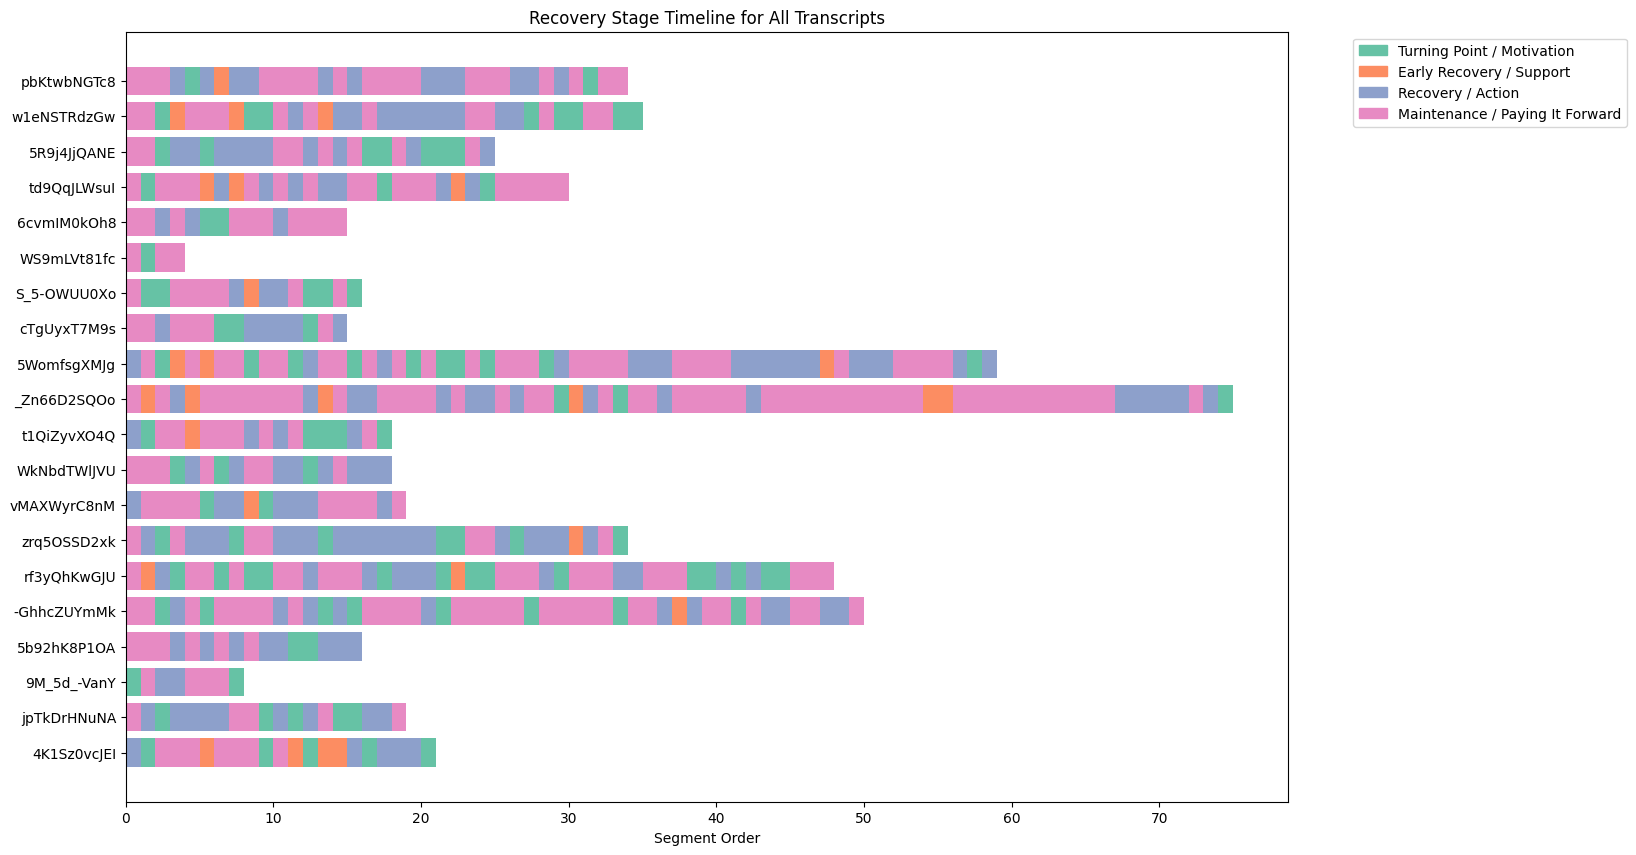

In [ ]:
import matplotlib.patches as mpatches

plt.figure(figsize=(15,10))

for i, vid in enumerate(video_ids):
    df_vid = df_all_segments[df_all_segments['video_id'] == vid].reset_index()
    for j, row in df_vid.iterrows():
        stage_idx = stage_order.index(row['stage_label'])
        plt.barh(i, 1, left=j, color=sns.color_palette("Set2")[stage_idx])

plt.yticks(range(len(video_ids)), video_ids)
plt.xlabel("Segment Order")
plt.title("Recovery Stage Timeline for All Transcripts")
# Create legend
colors = [sns.color_palette("Set2")[i] for i in range(len(stage_order))]
patches = [mpatches.Patch(color=colors[i], label=stage_order[i]) for i in range(len(stage_order))]
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
